In [7]:
# Authors: Ellianna Schwab and Itamar Reis

import pandas as pd
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})

In [8]:
from altair import Chart
chart = Chart(data)

In [9]:
data.columns

Index(['a', 'b'], dtype='object')

In [10]:
Chart(data).mark_point() #this will plot the points all on top of each other,
#because their positions have not been specified

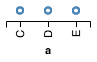

In [11]:
Chart(data).mark_point().encode(
    x='a', #now we specify the x-axis, but not yet a y-axis, so they'll be the same height
)

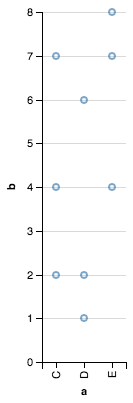

In [12]:
Chart(data).mark_point().encode(
    x='a',
    y='b'
)

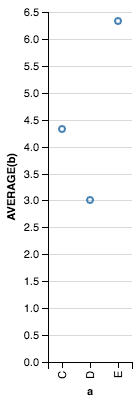

In [13]:
Chart(data).mark_point().encode(
    x='a',
    y='average(b)' #this averages for every y-value
)

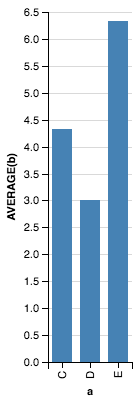

In [14]:
Chart(data).mark_bar().encode( #this does a bar chart instead
    x='a',
    y='average(b)'
)

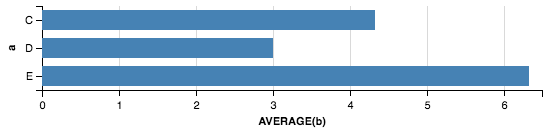

In [15]:
Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)

In [16]:
chart = Chart(data).mark_bar().encode(
    x='a',
    y='average(b)',
)
print(chart.to_json(data=False, indent=2))

{
  "encoding": {
    "x": {
      "field": "a",
      "type": "nominal"
    },
    "y": {
      "aggregate": "average",
      "field": "b",
      "type": "quantitative"
    }
  },
  "mark": "bar"
}


In [17]:
from altair import Y
y = Y('average(b):Q')
print(y.to_json()) #this allows pulling in the y-column in shorthand and we can check the json

{"aggregate": "average", "field": "b", "type": "quantitative"}


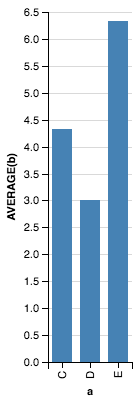

In [19]:
from altair import X, Y

Chart(data).mark_bar().encode(
    X('a', type='nominal'), #nominal is a number that is just a label
    Y('b', type='quantitative', aggregate='average')
)

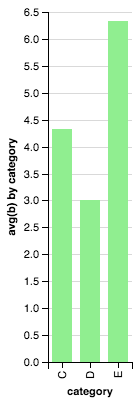

In [20]:
from altair import X, Y, Axis

Chart(data).mark_bar(color='lightgreen').encode(
    X('a', axis=Axis(title='category')),
    Y('average(b)', axis=Axis(title='avg(b) by category'))
)

In [21]:
chart = Chart(data).mark_bar().encode(
    x='a',
    y='average(b)',
)
html = chart.to_html()

In [32]:
from astropy.table import Table

data = Table.read("HATS-7b/HATS-7b_mrt.txt", format="ascii.cds")

In [33]:
data = data.to_pandas()
data.columns

Index(['BJD', 'mag', 'e_mag', 'Omag', 'Filter', 'Inst'], dtype='object')

In [39]:
BJD = data['BJD']
mag = data['mag']

data['day']=data['BJD']-data['BJD'].min()

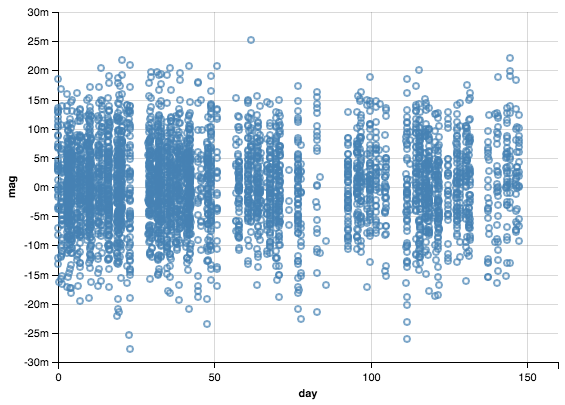

In [50]:
from altair import X, Y, Axis

Chart(data[:4000]).mark_point().encode(
    X('day', axis=Axis(title='day')),
    Y('mag', axis=Axis(title='mag'))
)

In [51]:
# from the paper the period is 3.1853 days

In [132]:
data['foldtimes'] = (data['BJD'] + 0.3*3.1853150) / 3.1853150 % 1 - 0.5
# data['foldtimes'] = [for data]

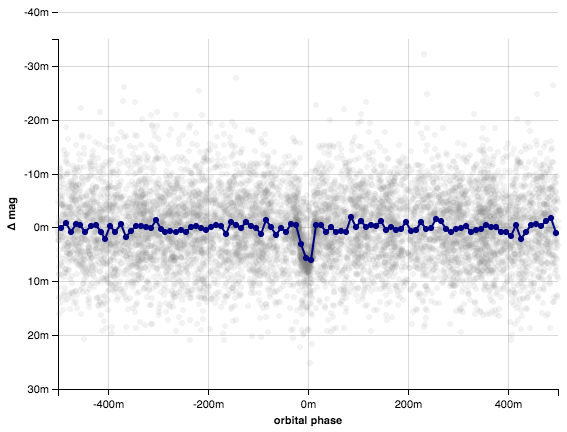

In [140]:
from altair import *

chart = LayeredChart(data)


chart += Chart(data).mark_circle(color='gray',opacity=0.1,).encode(
    X('foldtimes', axis=Axis(title='orbital phase')),
    Y('mag', axis=Axis(title='Δ mag'), scale=Scale(domain=(0.03, -0.035)))
)


# Add a rolling-mean as a line
chart += Chart(data).mark_line(color='navy').encode(
    X('foldtimes',bin=Bin(maxbins=100), axis=Axis(title='orbital phase')),
    Y('mean(mag)', axis=Axis(title='Δ mag'), scale=Scale(domain=(0.03, -0.035)))
)

chart += Chart().mark_circle(color='navy').encode(
    X('foldtimes',bin=Bin(maxbins=100), axis=Axis(title='orbital phase')),
    Y('mean(mag)', axis=Axis(title='Δ mag'), scale=Scale(domain=(0.03, -0.035)))
)

chart.display()

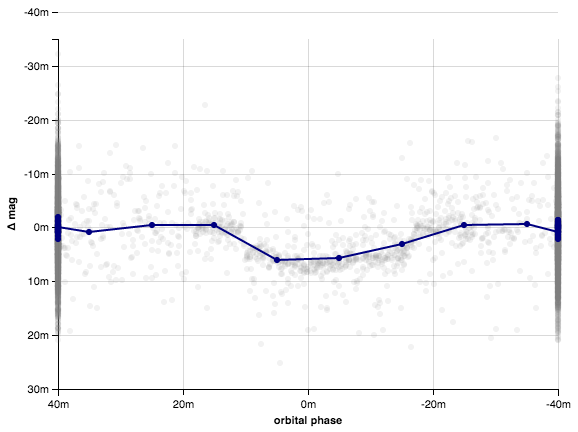

In [144]:
chart = LayeredChart(data)


chart += Chart(data).mark_circle(color='gray',opacity=0.1,).encode(
    X('foldtimes', axis=Axis(title='orbital phase'), scale=Scale(domain=(0.04, -0.04), clamp=True)),
    Y('mag', axis=Axis(title='Δ mag'), scale=Scale(domain=(0.03, -0.035)))
)


# Add a rolling-mean as a line
chart += Chart(data).mark_line(color='navy').encode(
    X('foldtimes',bin=Bin(maxbins=100), axis=Axis(title='orbital phase'), scale=Scale(domain=(0.04, -0.04), clamp=True)),
    Y('mean(mag)', axis=Axis(title='Δ mag'), scale=Scale(domain=(0.03, -0.035)))
)

chart += Chart().mark_circle(color='navy').encode(
    X('foldtimes',bin=Bin(maxbins=100), axis=Axis(title='orbital phase'), scale=Scale(domain=(0.04, -0.04), clamp=True)),
    Y('mean(mag)', axis=Axis(title='Δ mag'), scale=Scale(domain=(0.03, -0.035)))
)

chart.display()